# kinds Problem

In [1]:
import os; import sys;
from pprint import pprint

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from utils.utils_fancy_example.utils_fancy_example import *
from utils.utils_fancy_example.utils_computation_fancy_example import *
from utils.utils_fancy_example.utils_plot_fancy_example import *
from utils.utils_fancy_example.utils_ml_fancy_example import *

from utils.sklearn_tests_plot import *

In [2]:
np.random.seed(0)

T = 8
N_MIN, N_MAX = 8, 200
TARGET = 't'

In [3]:
DIR_IMAGES = 'images'
DIR_NOTEBOOK_IMG = 'fancy_example'
dest_dir_images = os.path.join(DIR_IMAGES, DIR_NOTEBOOK_IMG)

setup_dir_for_images(dest_dir_images)

full_path_trial = os.path.join(dest_dir_images, f"trial_{N_MIN}_to_{N_MAX}")
setup_dir_for_images(dest_dir_images)

## Rough Explanation

Let $a, b, x, y $ be numbers $\in N$, and let define the subsequent linear system:

\begin{equation}
    \begin{cases}
      x = w_{x1} \cdot a + w_{x2} \cdot b\\
      y = w_{y1} \cdot a + w_{y2} \cdot b\\
    \end{cases}\
\end{equation}

which can easily be converted into a matrix equivalent expression, in the following manner:

 \begin{gather}
 \begin{bmatrix} x  \\ y  \end{bmatrix}
 = \begin{bmatrix}
    w_{x1} & w_{x2} \\
    w_{y1} & w_{y2} \\
   \end{bmatrix} \cdot \begin{bmatrix} a  \\ b  \end{bmatrix}
\end{gather}

If we select some weight values what we obtain is the subsequent flow of relationships:

\begin{equation}
    \begin{cases}
      w_{x1} = 3/4 = 0.75 \\ w_{x2} = 1/2 = 0.50 \\
      w_{y1} = 1/4 = 0.25 \\ w_{y2} = 1/2 = 0.50
    \end{cases}\,
    \Rightarrow
    \begin{cases}
      x =  0.75 \cdot a + 0.50 \cdot b\\
      y = 0.25 \cdot a + 0.50 \cdot b\\
    \end{cases}\
    \Rightarrow
    \begin{bmatrix} x  \\ y  \end{bmatrix}
     = \begin{bmatrix}
     0.75 & 0.50 \\
    0.25 & 0.50 \\
   \end{bmatrix} \cdot \begin{bmatrix} a  \\ b  \end{bmatrix}
\end{equation}

In [4]:
raw_examples()

{'a': 4, 'b': 4, 'x': 5.0, 'y': 3.0, 't': 8}

In [5]:
raw_examples_v2()

{'a': 4, 'b': 4, 'x': 5.0, 'y': 3.0, 't': 8}

## Structural Expalnation

In [6]:
solve_problem(t=T, verbose=2, whole_solutions=False)

[2 4 6] <class 'numpy.ndarray'>
[2 4 6] <class 'numpy.ndarray'>
[4]
4 2 [4. 2.] 6.0
4 4 [5. 3.] 8.0
append [array([4, 4]), array([5., 3.]), 8]
4 6 [6. 4.] 10.0


array([[array([4, 4]), array([5., 3.]), 8]], dtype=object)

## Structural Simulation

In [7]:
t_attempts = np.arange(N_MIN, N_MAX, 2)
results = []

for t in t_attempts:
    sol = solve_problem(t=t, verbose=0, whole_solutions=True)
    # print(t, sol, len(sol))
    results.append(sol)
    pass

In [8]:
instances_x_result = np.array(list(map(lambda xi: len(xi), results)))
x, y = np.array(list(t_attempts)), instances_x_result

### Plots Strucutural Simulation

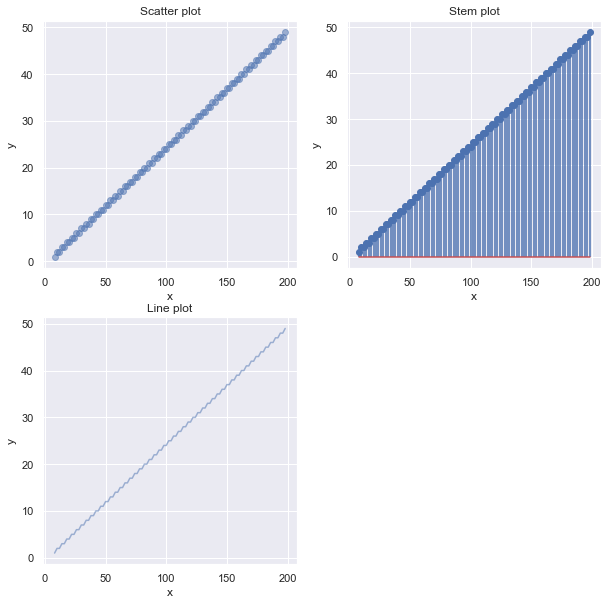

In [9]:
plot_stem_line_scatter(x, y, gridshape=[2, 2], figsize=(10, 10))

## Machine Learning Section

In [10]:
df = create_data_frame(raw_data=results)

In [11]:
# df.head(df.shape[0])
df.head(5)

,x,y,a,b,t
0,5.0,3.0,4.0,4.0,8.0
1,7.0,3.0,8.0,2.0,10.0
2,6.0,4.0,4.0,6.0,10.0
3,8.0,4.0,8.0,4.0,12.0
4,7.0,5.0,4.0,8.0,12.0


In [12]:
n_samples = df.shape[0]
x_vals = df.head(n_samples)[['x']].values
y_vals = df.head(n_samples)[['y']].values

In [13]:
diffs_x_y = x_vals - y_vals
x, y = list(range(len(diffs_x_y))), diffs_x_y

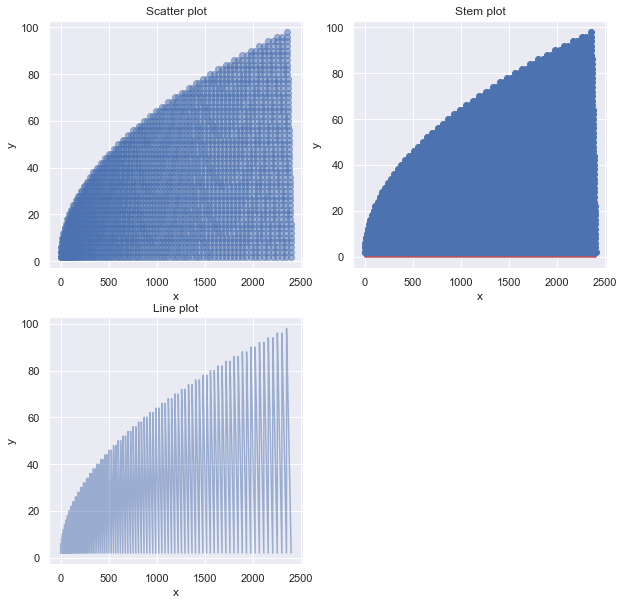

In [14]:
plot_stem_line_scatter(x, y, gridshape=[2, 2], figsize=(10, 10))

In [15]:
n_samples = df.shape[0]
a_vals = df.head(n_samples)[['a']].values
b_vals = df.head(n_samples)[['b']].values

In [16]:
diffs_a_b = a_vals - b_vals
x, y = list(range(len(diffs_a_b))), diffs_a_b

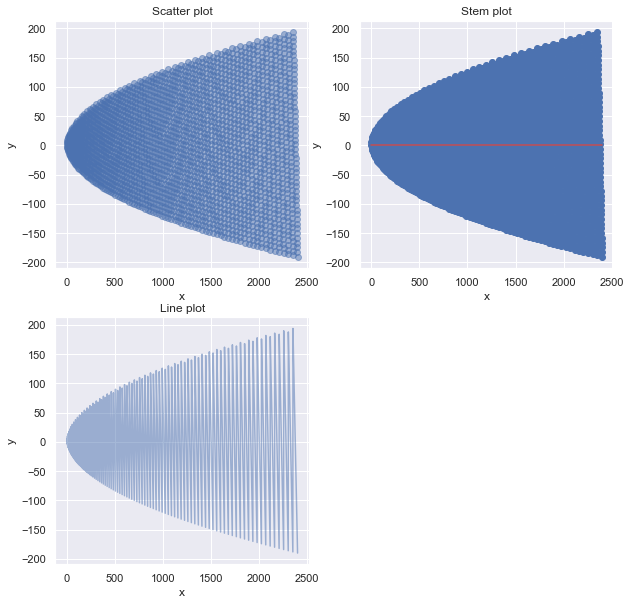

In [17]:
plot_stem_line_scatter(x, y, gridshape=[2, 2], figsize=(10, 10))

In [18]:
X = df.loc[:, df.columns != TARGET].values
y = df[[TARGET]].values

ValueError: Expected 2D array, got 1D array instead:
array=[124.  91.  74.  86.  96.  34. 106.  94.  79.  87.  96.  32.  97.  89.
 117. 102.  30. 110. 118. 115.  78.  97.  96. 103.  91.  48.  89. 109.
 104. 107. 101.  73. 137.  99. 105. 113.  37.  65.  57.  81.  60. 103.
  76.  74.  24.  72. 101. 123.  99.  84.  98.  90.  61. 113. 127. 124.
  99.  85.  88. 122.  95.  82. 113.  93. 114.  64. 109.  47. 133. 100.
  77. 121. 128.  98.  49.  36. 134.  36.  73. 104.  34.  59. 123.  84.
  69.  86.  97.  66.  31.  19.  88.  79.  41. 123. 100. 115.  76.  95.
  90. 123.  98.  87.  74. 107.  97. 101.  85.  91. 124. 112.  82. 124.
  99.  93.  60.  65.  96. 103.  98.  72.  77.  97.  96.  94. 119.  53.
  61. 113.  76.  40. 117.  87. 115.  49.  96.  79. 127.  44. 109.  78.
  82. 106.  99. 112. 100. 135.  84. 102. 111.  67. 119.  96.  74.  45.
 122.  79.  82.  94.  43.  84.  93.  86.  58.  19.  59.  99. 109.  42.
  53.  36.  54. 106. 125.  45.  56.  70.  46.  73. 106.  80. 118.  44.
  53. 101. 111.  83.  88. 111.  20. 126.  88.  45.  88.  90. 101.  24.
  41. 133.  96. 107.  84.  94.  64.  94. 122.  87.  72.  57.  45.  34.
 109.  62.  99.  87.  37. 142. 108. 119. 113.  81.  91.  50. 132.  79.
  91. 105.  64.  71.  93.  86.  87. 113.  74. 123.  32.  31. 107.  59.
 108.  89.  46. 113. 103.  72.  71. 115.  95. 120. 128.  66.  53.  55.
  46. 107. 108.  90.  75.  58.  58.  22.  22.  56.  23. 101. 113. 133.
  71.  31.  48.  70.  45. 100.  65. 113.  69. 104.  50.  79. 113. 102.
  48. 115. 108.  48.  19.  52.  51.  26.  84. 106.  67.  70. 115.  69.
  91.  38.  65. 110. 130.  57.  86.  75. 102.  60.  20.  94. 115.  90.
 104.  39. 131.  92.  50.  82. 122.  56. 121.  49. 100.  92. 102.  79.
  92.  42.  94.  47.  76.  64.  90. 106.  35. 123. 103. 106. 104.  25.
 128. 100.  93.  34.  73.  58.  51. 111.  89. 131.  68.  51. 100. 121.
 117.  64.  43.  67. 114.  78.  84. 108.  80. 126. 117.  11.  81.  81.
 137.  89.  69. 105.  23.  55.  94. 135. 107.  68.  41. 123.  70. 106.
 101.  36.  62.  96. 104.  38. 108.  82.  67.  81. 104. 128.  78.  69.
  79.  99.  51.  40.  90.  33.  16.  89.  89.  71. 116.  82.  32.  52.
  83. 110.  77. 119.  70.  75.  87.  27. 106. 122.  78. 105.  38.  59.
  53.  67.  92.  57. 104.  81. 129.  68.  32.  57. 100.  61. 129.  40.
 107. 136. 127. 143.  43.  85.  88.  54. 125. 130.  68. 103.  31. 129.
  55.  59.  94. 103.  60.  25.  65.  76.  42. 105.  71. 117.  74.  65.
  82. 125. 112.  98.  79.  57. 122.  53.  74. 128.  20.  78. 133. 103.
  36.  35.  63.  68.  35.  40. 121. 131.  54.  83. 114.  84. 118.  76.
  48. 132. 100.  59. 114. 113.  72. 107.  48. 120.  70.  93. 122. 118.
  94.  37. 115.  55. 110.  32.  60.  91.  60. 123. 113.  83.  90.  24.
 101.  92. 103.  81.  41. 100.  67. 108.  96.  53.  92.  45.  55.  99.
 131.  44. 110.  32.  58.  62.  70. 111. 103.  99.  39. 147.  77.  90.
 106.  64. 100.  92. 105.  84. 110.  71. 133.  85. 119.  12.  83.  98.
  62. 107.  86. 101. 123. 129.  49.  48.  51.  54.  36. 117.  88.  73.
 144. 100. 118.  65. 101.  95.  98.  78.  11.  96.  61.  52.  84.  47.
 108.  77.  85. 100.  87.  58.  63.  93.  51. 132. 115.  42. 136.  71.
  92. 115. 118. 102.  11.  44.  37.  56.  26. 126.  34. 115.  87. 103.
 113.  28.  73. 109. 112.  92.  61.  79.  79.  58.  84. 113.  87. 105.
  72.  22. 142. 109. 106. 126.  92. 102.  56.  86. 126.  57. 129. 105.
  78.  91.  28.  26.  88. 110. 101.  87.  96.  51.  99.  98.  87.  85.
  34.  84. 127.  67.  42.  64. 127.  81.  41.  63.  89.  59.  56.  52.
 128.  94.  94.  21.  89.  95.  32. 100.  78.  87.  33.  78. 105. 130.
  49.  69. 112. 100. 142.  55.  87.  15.  99.  76.  59.  61. 121. 100.
  26. 103.  68. 105. 138.  35. 112. 143.  82. 133.  69.  56.  54.  83.
 102. 138.  47.  21. 129.  16.  88.  77. 101.  60.  45. 114.  68. 103.
  69. 122. 105.  55.  46.  67. 101. 120.  99.  81. 137.  75. 109.  96.
  83. 139.  68.  84.  46.  82.  34.  94.  53.  50.  91. 139.  64. 130.
 129. 106. 101.  54. 112.  58.  72. 110. 121. 119.  88.  96.  70.  18.
 106. 121.  47. 102.  61. 103. 135. 111. 125. 107. 100.  47.  67.  87.
  47. 114.  65.  18.  88. 119.  65.  96.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

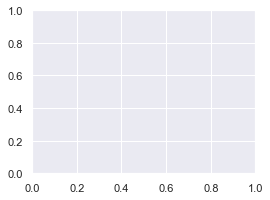

In [20]:
show_Ordinary_Least_Squares_vs_Ridge_Regression_Variance(X[:, 0], y)